# İkitelli Solar Power Plant Electricity Generation Analysis
#### In this notebook we are going to analyze the dataset "Electricity Generation Quantities of from the İkitelli Solar Power Plant"  provied by İstanbul Energy Inc. 
Location : Istanbul/Turkey
#### The dataset includes electricity amounts produced in May, June, August, September, November, December 2018 and February, March, April, May 2019
Data url = https://data.ibb.gov.tr/dataset/ikitelli-gunes-enerjisi-santrali-elektrik-uretim-miktarlari

#### Author: Ediz Anıl Özkaya

http://edizozkaya.com

LinkedIn: https://www.linkedin.com/in/ediz-anıl-özkaya-863bb6161

GitHub: https://github.com/EdizAnil



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
all_dfs = pd.read_excel("ikitelli-gune-enerjisi-santrali-elektrik-uretim-miktarlar.xlsx",sheet_name=None)

In [4]:
all_dfs.keys()

dict_keys(['Metadata_TR', 'Metadata_EN', 'Mayıs-2018', 'Haziran-2018', 'Ağustos-2018', 'Eylül-2018', 'Kasım-2018', 'Aralık-2018', 'Şubat-2019', 'Mart-2019', 'Nisan-2019', 'Mayıs-2019'])

#### Our data set does not include July 2018, October 2018 and January 2019. And we exclude May 2019.

In [5]:
for i in ['Metadata_TR', 'Metadata_EN', 'Mayıs-2019']:
    all_dfs.pop(i)

#### Now, we can combine the dataframes for each month into a new dataframe.

In [6]:
df = pd.concat(all_dfs, ignore_index=True)

#### Translation of columns from Turkish to English:

In [7]:
df = df.rename(columns={'Tarih' : 'Date','Üretim (kWh)' : 'Generation (kWh)'})

In [8]:
df

,Date,Generation (kWh)
0,2018-05-01 04:55:00,0.0
1,2018-05-01 05:00:00,0.0
2,2018-05-01 05:15:00,0.0
3,2018-05-01 05:30:00,0.0
4,2018-05-01 05:45:00,0.0
...,...,...
18112,2019-04-30 21:45:00,0.0
18113,2019-04-30 22:00:00,0.0
18114,2019-04-30 22:15:00,0.0
18115,2019-04-30 22:30:00,0.0


#### Then, we convert the data provided every 15 min. or so to daily generation data.

In [9]:
daily_generation = df.set_index('Date').resample('D')['Generation (kWh)'].sum()

In [10]:
daily_generation

Date
2018-05-01    6400.0
2018-05-02    5670.0
2018-05-03    6770.0
2018-05-04    5210.0
2018-05-05    1920.0
               ...  
2019-04-26    6096.0
2019-04-27    6398.0
2019-04-28    6323.0
2019-04-29    6682.0
2019-04-30    7345.0
Freq: D, Name: Generation (kWh), Length: 365, dtype: float64

In [11]:
daily_generation = daily_generation.to_frame().reset_index()

In [12]:
daily_generation

,Date,Generation (kWh)
0,2018-05-01,6400.0
1,2018-05-02,5670.0
2,2018-05-03,6770.0
3,2018-05-04,5210.0
4,2018-05-05,1920.0
...,...,...
360,2019-04-26,6096.0
361,2019-04-27,6398.0
362,2019-04-28,6323.0
363,2019-04-29,6682.0


In [13]:
daily_generation['Day'] = daily_generation['Date'].apply(lambda date: date.day)

In [14]:
daily_generation['Month'] = daily_generation['Date'].apply(lambda date: date.month)

In [15]:
daily_generation["Month"].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

#### The dataset does not include the generation data for months 1,7 and 10 thus we need to exclude the months 1,7 and 10.

In [16]:
daily_generation = daily_generation.loc[~((daily_generation["Month"]==1) | (daily_generation["Month"]==7) | (daily_generation["Month"]==10))]

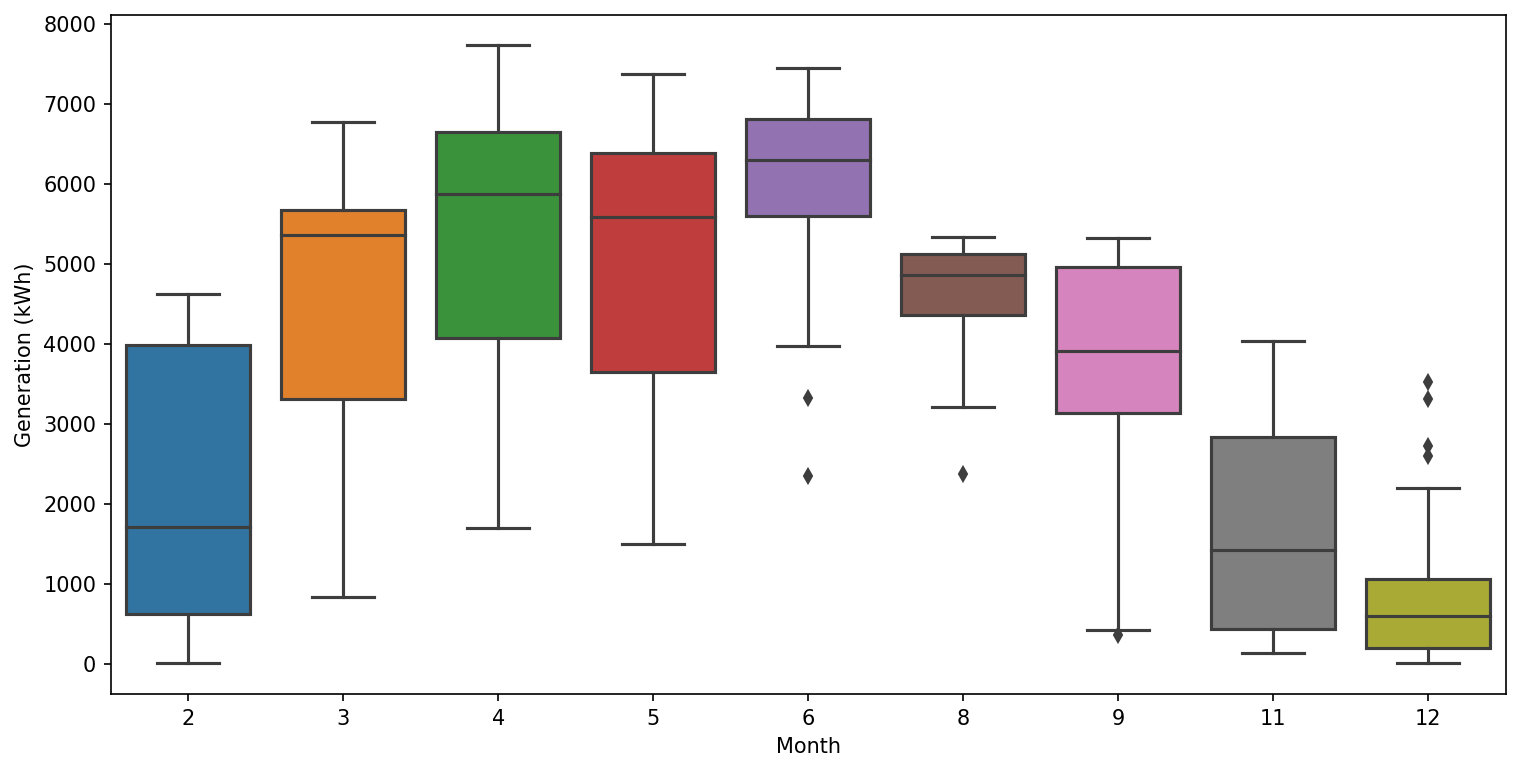

In [17]:
plt.figure(figsize=(12,6),dpi=150)
sns.boxplot(x='Month',y='Generation (kWh)',data=daily_generation);

#### As we can see above the electricity generation tends to be higher in spring and summer than fall and winter. Which makes sense considering the sunshine durations.

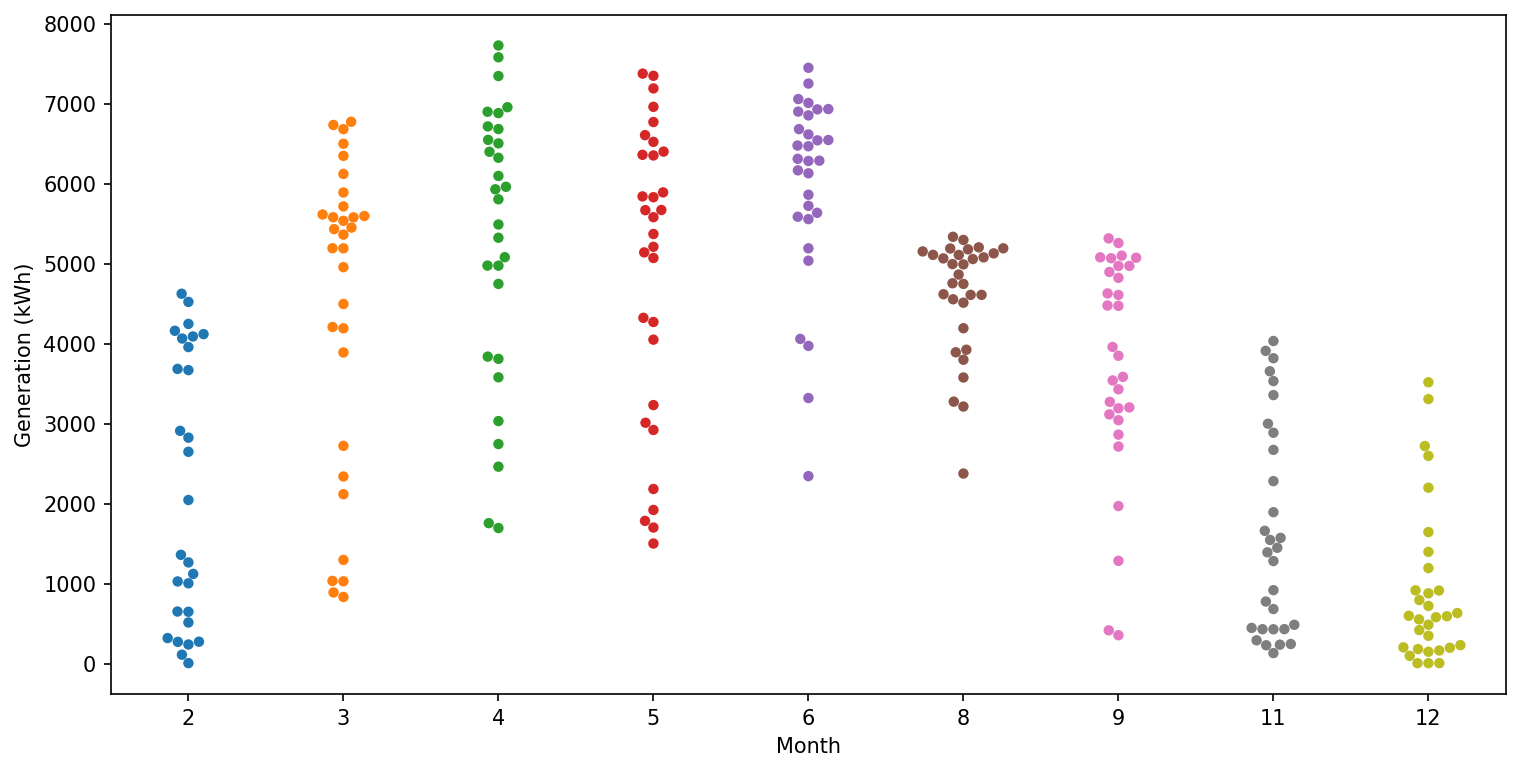

In [18]:
plt.figure(figsize=(12,6),dpi=150)
sns.swarmplot(x='Month',y='Generation (kWh)',data=daily_generation,size=5);

#### The distribution of daily electricity generation can be seen from the swarm plot above. 

In [19]:
daily_generation = daily_generation.drop('Date', axis=1)

In [20]:
df = daily_generation.pivot(index='Month', columns='Day', values='Generation (kWh)')

In [21]:
df

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
2,2647.0,3668.00,2909.0,4118.0,650.00,318.00,110.00,271.0,1026.00,4246.00,...,2824.00,513.00,5.0,238.00,4521.00,1264.00,3956.00,NaN,NaN,NaN
3,4191.0,1028.00,5578.0,5595.0,5191.00,2721.00,5362.00,5614.0,5192.00,5535.00,...,6347.00,4495.00,6498.0,6733.00,6121.00,2117.00,6773.00,5715.00,4207.00,4955.00
4,5323.0,4975.00,5489.0,5929.0,6898.00,5080.00,4746.00,5960.0,3837.00,1694.00,...,7579.00,6881.00,6715.0,6547.00,6096.00,6398.00,6323.00,6682.00,7345.00,NaN
5,6400.0,5670.00,6770.0,5210.0,1920.00,1700.00,1500.00,4049.0,2920.00,4270.00,...,1783.00,5580.00,6522.0,3231.00,6352.00,2182.00,4322.00,3009.99,7348.02,7375.01
6,6900.0,7251.03,7448.0,6166.0,5722.01,6283.02,6614.98,6932.0,6467.02,5634.99,...,5035.99,3970.99,3319.0,6286.98,5191.01,5585.98,5861.01,6680.98,5555.99,NaN
8,4609.0,4609.00,4754.0,5128.0,5065.00,4990.00,4746.00,4554.0,5108.00,5057.00,...,4994.00,5109.00,3274.0,5178.00,5152.00,4192.00,3576.00,3798.00,3213.00,5189.00
9,5078.0,4971.00,4608.0,4472.0,3848.00,3428.00,3042.00,2713.0,3584.00,4821.60,...,4970.00,5099.00,5315.0,415.00,1969.00,354.00,3202.00,3539.00,1284.00,NaN
11,3909.0,2998.00,3356.0,3817.0,2280.00,1659.00,2885.00,1390.0,1892.00,3531.00,...,430.00,235.00,1281.0,2671.00,429.00,917.00,130.00,484.00,445.00,NaN
12,631.0,720.00,1396.0,579.0,202.00,597.00,1643.00,3516.0,878.00,485.00,...,4.00,4.00,5.0,96.00,2596.00,591.00,3306.00,181.00,552.00,2198.00


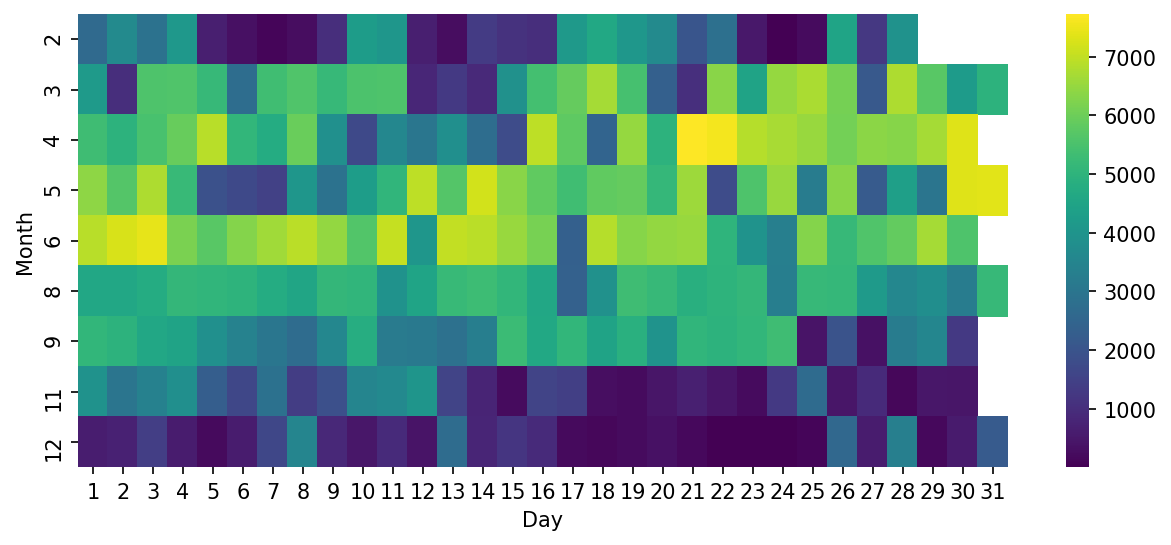

In [22]:
plt.figure(figsize=(10,4),dpi=150)
sns.heatmap(df,cmap='viridis');

#### The electricity genertion in months 4,5,6,7 and 8 are higher than the other months. Months 12 and 8 have pretty uniform electricity generation behaviors however some months (etc. 3 and 4) have more irregular generation behaviors. The possible causes will be discussed in Conclusion. 

#### Calculation of 7-day moving averages.

In [23]:
daily_generation['Generation (kWh)'] = daily_generation['Generation (kWh)'].rolling(7).mean().shift(-3)

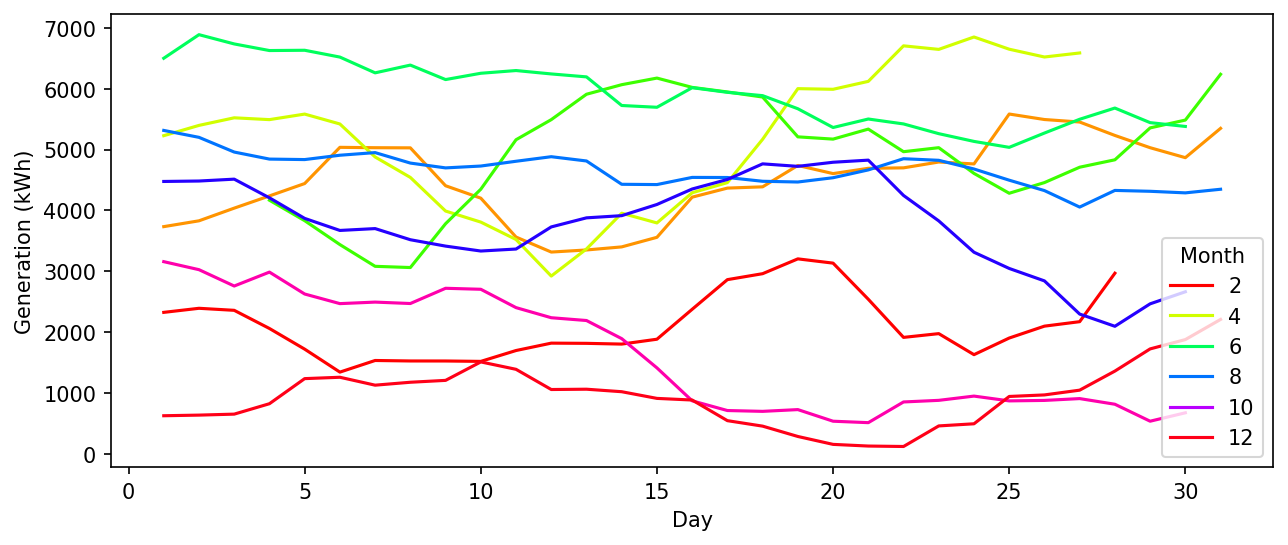

In [24]:
plt.figure(figsize=(10,4), dpi=150)
sns.lineplot(data=daily_generation, x='Day',y='Generation (kWh)',hue='Month',palette='hsv',
             markers=True, estimator= 'mean');

## Conclusion
#### The daily electricity generation in kWh shown in the figures above. The data includes comperatively higher daily differences of daily electricity generation for some months. This indicates that the electricity generation can be affected by various parameters like precipitation, cloudiness, sunshine duration etc. Further investigation is needed for better undarstanding of the behavior. 

I will be working on further analysis including the historical meteorological data of Istanbul and hopefully deploy an energy generation estimation model.